<>:66: SyntaxWarning: invalid escape sequence '\S'
<>:66: SyntaxWarning: invalid escape sequence '\S'
/var/folders/80/3_r0dytx0g58z7ybrd36jc_40000gn/T/ipykernel_69713/2321093340.py:66: SyntaxWarning: invalid escape sequence '\S'
  ax[i,0].set_ylabel("Gas surface density $\Sigma$ [g cm$^{-2}$]", fontsize = 13)


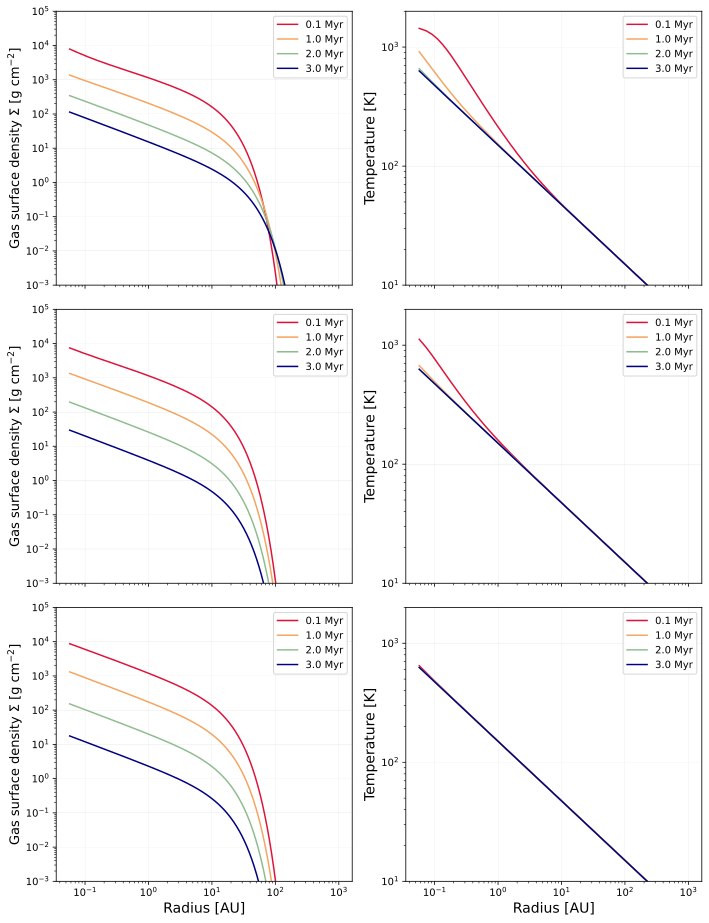

In [3]:
import sys
import os

# Add the path to the DiscEvolution directory
sys.path.append(os.path.abspath("../DiscEvolution"))
%config InlineBackend.figure_format = 'svg'
figpath = "/Users/safwankhan/Library/CloudStorage/OneDrive-UniversityofWaterloo/University/4A/PHYS 437A/Final Report/figures/"

import numpy as np
import matplotlib.pyplot as plt

from DiscEvolution.constants import *
from DiscEvolution.disc_winds import DiskWindEvolution
from DiscEvolution.eos import ChambersEOS, IrradiatedEOS, LocallyIsothermalEOS
from DiscEvolution.star import SimpleStar
from DiscEvolution.grid import Grid
from DiscEvolution.dust import DustGrowthTwoPop, SingleFluidDrift
from DiscEvolution.viscous_evolution import ViscousEvolutionFV, ViscousEvolution
from DiscEvolution.planet_formation import Planets, PebbleAccretionHill, Bitsch2015Model

init_params = {"sigma0":1500,
                "r0":1, 
                "T0":150, 
                "v0":30,
                "fw":0,
                "K":0.05, 
                "Tevap":1500, 
                "rexp":15,
                "k0":0.1,
                "rmin":0.05,
                "rmax":1000,
                "nr":1000,
                "initial_frac":0.01}

star = SimpleStar()
wind = DiskWindEvolution(star, init_params['sigma0'],init_params['r0'],init_params['T0'],
                            init_params['v0'],init_params['fw'],
                            init_params['K'],init_params['Tevap'],
                            init_params['rexp'],init_params['k0'])

grid = Grid(0.05, 1000, 1000, "natural")
eos = ChambersEOS(star, init_params['sigma0'],init_params['r0'],init_params['T0'],
                            init_params['v0'],init_params['fw'],
                            init_params['K'],init_params['Tevap'],
                            init_params['rexp'],init_params['k0'])
eos.set_grid(grid)

wind.get_suzuki_params()

alpha = [
    {"alpha_turb": 1e-3, "alpha_wind": 2.5e-4},
    {"alpha_turb": 1e-4, "alpha_wind": 2.7e-4},
    {"alpha_turb": 1e-6, "alpha_wind": 2.8e-4}
]

colours = ["crimson", "sandybrown", "darkseagreen", "navy"]
fig, ax = plt.subplots(3,2, figsize = (10,13), sharex='col')

for i, alphas in enumerate(alpha):
    n=0
    wind.calculate_chambers_params(alphas["alpha_turb"], alphas["alpha_wind"], set = True)
    for t in np.array([0.1,1,2,3])*1e6:
        Sigma,T,_,_ = wind(star, grid.Rc, t)
        ax[i,0].loglog(grid.Rc, Sigma, label = f"{t/1e6} Myr", color = colours[n])
        ax[i,1].loglog(grid.Rc, T, label = f"{t/1e6} Myr", color = colours[n])
        ax[i,0].set_ylabel("Gas surface density $\Sigma$ [g cm$^{-2}$]", fontsize = 13)
        if i == 2:
            ax[i,0].set_xlabel("Radius [AU]", fontsize = 14)
            ax[i,1].set_xlabel("Radius [AU]", fontsize = 14)
        ax[i,0].set_ylim(1e-3, 1e5)
        ax[i,1].set_ylim(10, 2e3)
        ax[i,1].set_ylabel("Temperature [K]", fontsize = 14)
        ax[i,0].legend()
        ax[i,1].legend()
        ax[i,0].grid(which = "major", linewidth=0.1)
        # ax[i,0].grid(which = "minor", linewidth=0.02)
        ax[i,1].grid(which = "major", linewidth=0.1)
        # ax[i,1].grid(which = "minor", linewidth=0.02)
        n+=1

fig.tight_layout()
fig.savefig(figpath+"viscous_dom.pdf")

In [ ]:
# from DiscEvolution.eos import ChambersEOS

# def setup_model(**kwargs):
    
#     # Class inheritance AccretionDisc > DustyDisc > DustGrowthTwoPop 
#     star = SimpleStar()
#     init_params = {"sigma0":3450,
#                     "r0":1, 
#                     "T0":150, 
#                     "v0":30,
#                     "fw":0,
#                     "K":0.05, 
#                     "Tevap":1500, 
#                     "rexp":15,
#                     "k0":0.1,
#                     "rmin":0.05,
#                     "rmax":1000,
#                     "nr":1000,
#                     "initial_frac":0.01}

#     for key, value in kwargs.items():
#         if key in init_params:
#             try:
#                 # If the current value has units, apply the units to the new value
#                 current_value = init_params[key]
#                 units = getattr(current_value, 'unit', None)
#                 if units:
#                     init_params[key] = value * units  # Assign new value with the same units
#                 else:
#                     init_params[key] = value  # Assign new value without units
#             except Exception as e:
#                 print(f"Error updating {key}: {e}")
#                 init_params[key] = value  # Fallback to assigning the raw value

#     if kwargs:
#         print("Simulation parameters:", kwargs)

#     grid = Grid(init_params['rmin'], init_params['rmax'], init_params['nr'])
#     wind = DiskWindEvolution(star, init_params['sigma0'],init_params['r0'],init_params['T0'],
#                              init_params['v0'],init_params['fw'],
#                              init_params['K'],init_params['Tevap'],
#                              init_params['rexp'],init_params['k0'])

#     eos = ChambersEOS(star, init_params['sigma0'],init_params['r0'],init_params['T0'],
#                              init_params['v0'],init_params['fw'],
#                              init_params['K'],init_params['Tevap'],
#                              init_params['rexp'],init_params['k0'])
#     eos.set_grid(grid)

#     drift = SingleFluidDrift(settling=True)

#     Sigma = wind(star, grid.Rc, 0)[0]
#     dust = DustGrowthTwoPop(grid, star, eos, init_params['initial_frac'], Sigma, feedback=True)

#     return star, grid, wind, eos, drift, dust

In [ ]:
# star, grid, wind, eos, drift, dust = setup_model(fw=0,K=0)
# star2, grid2, wind2, eos2, drift2, dust2 = setup_model(fw=0,K=0)

# times = np.array([0.001, 0.01, 0.1])*2*np.pi*1e6
# ts = []

# t = 0
# n = 0
# for ti in times:
#     while t < ti:
#         dt = 0.5*drift.max_timestep(dust)

#         dust.update(dt)
#         drift(dt, dust)
#         t = np.minimum(t + dt, ti)
#         n += 1

#         ts.append(dt)
#         if (n % 1000) == 0:
#             print('Nstep: {}'.format(n))
#             print('Time: {} yr'.format(t / (2 * np.pi)))
#             print('dt: {} yr'.format(dt / (2 * np.pi)))
#     # print((np.sum(ts)-dt)/(2*np.pi))
#     Sigma, temps, _, _ = wind2(star2, grid2.Rc, (np.sum(ts)-dt)/(2*np.pi))

#     diffs = temps - dust.T

#     plt.plot(grid.Rc, diffs, label="{} yr".format(round(t / (2*np.pi))))
#     # plt.loglog(grid.Rc, temps, label="{} yr".format(round(t / (2*np.pi))))
#     # plt.loglog(grid.Rc, dust.T, label="{} yr".format(round(t / (2*np.pi))))

#     plt.ylabel("Temp Difference [K]")
#     plt.xlabel("Distance [AU]")
#     print('Nstep: {}'.format(n))
#     print('Time: {} yr'.format(t / (2 * np.pi)))
    
# plt.legend()

# plt.legend()
# plt.show()

In [ ]:
# grid = Grid(0.05, 1000, 1000, "natural")
# star = SimpleStar()
# wind = DiskWindEvolution(star, init_params['sigma0'],init_params['r0'],init_params['T0'],
#                             init_params['v0'],init_params['fw'],
#                             init_params['K'],init_params['Tevap'],
#                             init_params['rexp'],init_params['k0'])
# # eos = ChambersEOS(star, init_params['sigma0'],init_params['r0'],init_params['T0'], init_params['v0'],init_params['fw'], init_params['K'],init_params['Tevap'], init_params['rexp'],init_params['k0'])
# # eos = LocallyIsothermalEOS(star, 1/30., -0.25, 1e-3)
# eos.set_grid(grid)

# Sigma = wind(star, grid.Rc, 0.1)[0]

# d2g = 0.01
# settling=True
# dust = SingleFluidDrift(settling=settling)


# wind.get_suzuki_params()
# wind.calculate_chambers_params(1e-3, 2.5e-4, set = True)
# # eos.update_params(wind)

In [ ]:
# disc = DustGrowthTwoPop(grid, star, eos, d2g, Sigma=Sigma)
# PebAcc = PebbleAccretionHill(disc)
# planets = Planets(Nchem = 0)
# planets.add_planet(0, 30, 0.1, 0)
# planet_model = Bitsch2015Model(disc, pb_gas_f=0.0)

In [ ]:
def booth(winds = False, alpha_turb=1e-3, alpha_wind=2.5e-4):

    alpha = 1e-3
    Mdot  = 1e-8
    Rd    = 100.

    N_cell = 1000
    R_in  = 0.05
    R_out = 1000.

    yr = 2*np.pi

    # Setup the initial conditions
    Mdot *= (Msun / yr) / AU**2

    grid = Grid(R_in, R_out, N_cell, spacing='natural')
    star = SimpleStar()

    # Initial guess for Sigma:
    R = grid.Rc
    Sigma = (Mdot / (0.1 * alpha * R**2 * star.Omega_k(R))) * np.exp(-R/Rd)

    # Iterate until constant Mdot
    eos = LocallyIsothermalEOS(star, 1/30., -0.25, alpha)
    if winds:
        eos = ChambersEOS(star, init_params['sigma0'],init_params['r0'],init_params['T0'],
                             init_params['v0'],init_params['fw'],
                             init_params['K'],init_params['Tevap'],
                             init_params['rexp'],init_params['k0'])
        
        wind = DiskWindEvolution(star, init_params['sigma0'],init_params['r0'],init_params['T0'],
                                init_params['v0'],init_params['fw'],
                                init_params['K'],init_params['Tevap'],
                                init_params['rexp'],init_params['k0'])
        Sigma = wind(star, grid.Rc, 0)[0]
        wind.calculate_chambers_params(alpha_turb, alpha_wind, set=True)
        eos.update_params(wind)
    
    eos.set_grid(grid)
    # eos.update(0, Sigma)

    # Create the disc object
    disc = DustGrowthTwoPop(grid, star, eos, 0.01, Sigma=Sigma)
    gas = ViscousEvolutionFV()
    dust = SingleFluidDrift(settling=True)
    planets = Planets(Nchem = 0)
    planets.add_planet(0, 30, 0.1, 0)
    planet_model = Bitsch2015Model(disc, pb_gas_f=0.0)

    if winds:
        return grid, star, eos, disc, dust, gas, wind, planets, planet_model
    else:
        return grid, star, eos, disc, dust, gas, planets, planet_model

/Users/safwankhan/Library/CloudStorage/OneDrive-UniversityofWaterloo/University/4A/PHYS 437A/DiscEvolution/DiscEvolution/DiscEvolution/planet_formation.py:414: RuntimeWarning: divide by zero encountered in divide
  Xi = nu/Pr
/Users/safwankhan/Library/CloudStorage/OneDrive-UniversityofWaterloo/University/4A/PHYS 437A/DiscEvolution/DiscEvolution/DiscEvolution/planet_formation.py:300: RuntimeWarning: divide by zero encountered in power
  f2 = 1 - (1-gk0)*p**-(8/3.)
/Users/safwankhan/Library/CloudStorage/OneDrive-UniversityofWaterloo/University/4A/PHYS 437A/DiscEvolution/DiscEvolution/DiscEvolution/planet_formation.py:162: RuntimeWarning: divide by zero encountered in divide
  Mdot_PY = self._fPiso * T81**-0.5 * M_core**(11/3.) / M_env


Nstep: 1000
Time: 4455.946396668509 yr
dt: 4.458374857536604 yr
Nstep: 2000
Time: 8916.101463775456 yr
dt: 4.462282817127865 yr
Nstep: 3000
Time: 13381.218897093742 yr
dt: 4.468296654437243 yr
Nstep: 4000
Time: 17853.402895168827 yr
dt: 4.476413822396012 yr
Nstep: 5000
Time: 22334.27758041374 yr
dt: 4.483764982456777 yr
Nstep: 6000
Time: 26819.720913801073 yr
dt: 4.487464966065492 yr
Nstep: 7000
Time: 31309.905139892402 yr
dt: 4.493243770591028 yr
Nstep: 8000
Time: 35806.90710933574 yr
dt: 4.501098242964123 yr
Nstep: 9000
Time: 40312.62274477179 yr
dt: 4.509281182176836 yr
Nstep: 10000
Time: 44823.46869286207 yr
dt: 4.5127498395350605 yr
Nstep: 11000
Time: 49338.81094208068 yr
dt: 4.518270719702374 yr
Nstep: 12000
Time: 53860.699439069096 yr
dt: 4.525840034981265 yr
Nstep: 13000
Time: 58391.16598465622 yr
dt: 4.534932736621459 yr
Nstep: 14000
Time: 62927.53858417386 yr
dt: 4.538147535300604 yr
Nstep: 15000
Time: 67468.14059937862 yr
dt: 4.543388430731016 yr
Nstep: 16000
Time: 72014.995

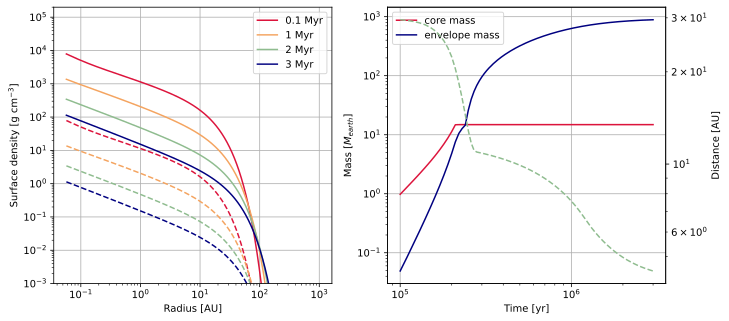

In [ ]:
# disc = DustGrowthTwoPop(grid, star, eos, d2g, Sigma=Sigma)
# times = np.array([0.1, 1, 2, 3])*1e6*2*np.pi
winds = True
grid, star, eos, disc, dust, gas, planets, planet_model = booth()
if winds:
    grid, star, eos, disc, dust, gas, wind, planets, planet_model = booth(winds = winds)
times = np.arange(0.1,3+0.01,0.01)*1e6*2*np.pi
core_mass = []
env_mass = []
dist = []
ts = []
n=0
n2=0
t=0
fig, ax = plt.subplots(1,2, figsize = (11,5))
colours = ["crimson", "sandybrown", "darkseagreen", "navy"]

for ti in times:
    while t < ti:
        if winds:
            dt = wind.max_timestep(disc)
            dt = min(dt, dust.max_timestep(disc))
            Sigma_new = wind(star, grid.Rc, t/(2*np.pi))[0]
            disc.set_surface_density(Sigma_new)
        else:
            dt = gas.max_timestep(disc)
            v_visc = gas.viscous_velocity(disc)
            dt = min(dt, dust.max_timestep(disc))

        dt = min(dt, ti - t)
        
        #winds
        # Sigma_new = wind(star, grid.Rc, t/(2*np.pi))[0]
        # disc.set_surface_density(Sigma_new)
        
        # Do dust evolution
        # dust(dt, disc)
        # dust(dt, disc, v_visc=v_visc)

        if winds == False:
            dust_frac = disc.dust_frac
            gas(dt, disc, [dust_frac])

        # gap = np.ones_like(disc.Sigma)
        # # for p in planets:
        # #     p.update(dt, disc)
        # # gap *= p.gap_profile(disc)
        # disc.set_gap_profile(gap)
        
        planet_model.update()
        planet_model.integrate(dt, planets)

        disc.update(dt)
        
        t += dt
        n += 1
        if (n % 1000) == 0:
            print('Nstep: {}'.format(n))
            print('Time: {} yr'.format(t / (2 * np.pi)))
            print('dt: {} yr'.format(dt / (2 * np.pi)))

    core_mass.append(planets.M_core)
    env_mass.append(planets.M_env)
    dist.append(planets.R)
    ts.append(ti/(2*np.pi))

    diffs = ti - np.array([0.1, 1, 2, 3])*1e6*2*np.pi
    if np.any(np.abs(diffs) < 1):
        time_labels = [0.1, 1, 2, 3]
        ax[0].loglog(grid.Rc, disc.Sigma, color = colours[n2], label = f"{time_labels[n2]} Myr")
        ax[0].loglog(grid.Rc, disc.Sigma_D[0]+disc.Sigma_D[1], color = colours[n2], linestyle = "--")
        ax[0].set_xlabel("Radius [AU]")
        ax[0].set_ylabel("Surface density [g cm$^{-3}$]")
        n2+=1

ax[0].set_ylim(1e-3, 2e5)
ax[0].grid(which = "major")
# ax[0].grid(which = "minor")
# ax[1].grid(which = "minor")
ax[1].grid(which = "major")

ax[1].loglog(ts, core_mass, label="core mass", color = "crimson")
ax[1].loglog(ts, env_mass, label="envelope mass", color = "navy")
ax[1].set_xlabel("Time [yr]")
ax[1].set_ylabel("Mass [$M_{earth}$]")
ax2 = ax[1].twinx()
ax2.loglog(ts, dist, label = "position", color = "darkseagreen", linestyle = "--")
ax2.set_ylabel("Distance [AU]")
ax[1].legend()
ax[0].legend()

In [ ]:
planets.M_core
planets.M_env

array([61.6492949])